In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/vaibh/OneDrive/Desktop/Car_price_predictor/car_project_dataset.csv',header=0)

In [3]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


* Missing Value in kms_driven and fuel_type column (done)

In [5]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [6]:
df['Price'].head()

0           80,000
1         4,25,000
2    Ask For Price
3         3,25,000
4         5,75,000
Name: Price, dtype: object

* Price has 'Ask For Price' in it. So remove those Columns (done)
* Price is an object convert into int

In [7]:
df['kms_driven'].head()

0    45,000 kms
1        40 kms
2    22,000 kms
3    28,000 kms
4    36,000 kms
Name: kms_driven, dtype: object

In [8]:
df['fuel_type'].head()

0    Petrol
1    Diesel
2    Petrol
3    Petrol
4    Diesel
Name: fuel_type, dtype: object

In [9]:
# Removing all null row where fuel type is not available
df = df[~df['fuel_type'].isna()]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    object
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 45.8+ KB


In [11]:
df[df['kms_driven'].isna()]

,name,company,year,Price,kms_driven,fuel_type


* There are no null value in kms_driven now since it got removed with fuel type none column

In [12]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    object
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 45.8+ KB


In [14]:
df = df[~(df['Price'] == 'Ask For Price')]

In [15]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel


In [16]:
df.shape

(816, 6)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    object
 3   Price       816 non-null    object
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: object(6)
memory usage: 44.6+ KB


* Now that we Removed all rows containing null element we would focus on changing datatype.

1. Price is object convert it into int also remove ',' from price values
2. kms_driven has kms at end of it slice the first value and convert it into int after removing ',' from its value.
3. Convert year in int.

In [18]:
df['year'] = df['year'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    object
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 41.4+ KB


In [20]:
df['Price'] = df['Price'].str.replace(',','')

In [21]:
df['Price'].head()

0     80000
1    425000
3    325000
4    575000
6    175000
Name: Price, dtype: object

In [22]:
df['Price'] = df['Price'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


In [24]:
df['kms_driven'] = df['kms_driven'].str.replace(',','').str.replace('kms','').astype(int)

In [25]:
df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 816, dtype: int32

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [27]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


* Now we need to take out first three letter from the name of car.
* Reset our index.

In [28]:
df['name'] = df['name'].str.split(' ')

In [29]:
df['name']

0        [Hyundai, Santro, Xing, XO, eRLX, Euro, III]
1                        [Mahindra, Jeep, CL550, MDI]
3      [Hyundai, Grand, i10, Magna, 1.2, Kappa, VTVT]
4              [Ford, EcoSport, Titanium, 1.5L, TDCi]
6                                        [Ford, Figo]
                            ...                      
883                  [Maruti, Suzuki, Ritz, VXI, ABS]
885                  [Tata, Indica, V2, DLE, BS, III]
886                          [Toyota, Corolla, Altis]
888                          [Tata, Zest, XM, Diesel]
889                            [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [30]:
df['name'] = df['name'].str.slice(0,3)

In [31]:
df['name'] = df['name'].str.join(' ')

In [32]:
df['name']

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


* Resetting our index

In [34]:
df = df.reset_index(drop=True)

In [35]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


## Now our data is completely cleaned :

In [36]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [37]:
df.shape

(816, 6)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [39]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


1. Now there are no missing value.
2. kms_driven has outlier.(at upper value)
3. Price has outlier.(at upper value)

<AxesSubplot:ylabel='Price'>

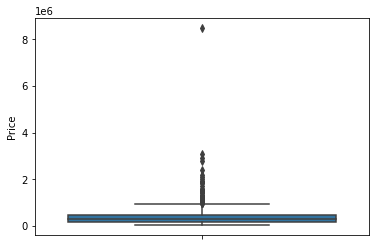

In [40]:
# From Graph we can see there is a outlier at upper value
sns.boxplot(y =df['Price'],data=df)

<AxesSubplot:ylabel='kms_driven'>

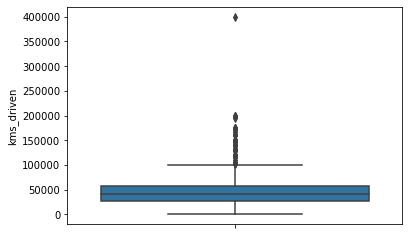

In [41]:
sns.boxplot(y =df['kms_driven'],data=df)

* Note : According to general rule of thumb we should remove an outlier if it has value higher than 3 times of 99th percentile value 

In [42]:
uv = np.percentile(df['Price'],[99])[0]

In [43]:
uv

1898666.6500000001

In [44]:
df[df['Price'] > 3*uv]

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


There is only one value greater than our 99th percentile value so we will remove it by 3 times of 99th percentile value itself.

In [45]:
df.Price[df['Price'] > 3*uv] = 3*uv

C:\Users\vaibh\AppData\Local\Temp\ipykernel_19772\3747864652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Price[df['Price'] > 3*uv] = 3*uv


In [46]:
df[df['Price'] > 3*uv]

,name,company,year,Price,kms_driven,fuel_type


In [47]:
uv = np.percentile(df['kms_driven'],[99])[0]

In [48]:
uv

174590.00000000012

In [49]:
df[df['kms_driven'] > 3*uv]

,name,company,year,Price,kms_driven,fuel_type


There are no value greater than 99th percentile so there are no outlier to be removed

## Cleaned Data With No Outliers :

In [50]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
4,Ford Figo,Ford,2012,175000.0,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000.0,50000,Petrol
812,Tata Indica V2,Tata,2009,110000.0,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000.0,132000,Petrol
814,Tata Zest XM,Tata,2018,260000.0,27000,Diesel


In [51]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000,Diesel
4,Ford Figo,Ford,2012,175000.0,41000,Diesel


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        816 non-null    object 
 1   company     816 non-null    object 
 2   year        816 non-null    int32  
 3   Price       816 non-null    float64
 4   kms_driven  816 non-null    int32  
 5   fuel_type   816 non-null    object 
dtypes: float64(1), int32(2), object(3)
memory usage: 32.0+ KB


In [53]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.082813e+05,46275.531863
std,4.002992,4.240049e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,5.696000e+06,400000.000000


In [54]:
df.to_csv('cleaned_car_dataset.csv')